# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [31]:
import csv
import re

def preprocess_text(text):
    """Preprocesses the text by cleaning and tokenizing it."""
    cleaned_text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = cleaned_text.split()
    return tokens

def generate_ngrams(tokens, n=3):
    """Generates n-grams from a list of tokens."""
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

def count_ngrams(ngrams_list):
    """Counts the occurrences of n-grams in a list."""
    ngram_counts = {}
    for ngram in ngrams_list:
        if ngram in ngram_counts:
            ngram_counts[ngram] += 1
        else:
            ngram_counts[ngram] = 1
    return ngram_counts

def ngram_analysis(dataset_file):
    """Performs n-gram analysis on a dataset."""
    ngrams_list = []
    with open(dataset_file, 'r', encoding='utf-8') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            clean_review = row['Clean_Text']
            tokens = preprocess_text(clean_review)
            trigrams = generate_ngrams(tokens)
            ngrams_list.extend(trigrams)

    ngram_counts = count_ngrams(ngrams_list)
    return ngram_counts

dataset_file = '//content/Saltburn_reviews_cleaned.csv'

# N-gram Analysis
ngram_counts = ngram_analysis(dataset_file)
for ngram, count in ngram_counts.items():
    print(f'N-gram: {ngram}, Frequency: {count}')



N-gram: ('ye', 'deriv', 'ye'), Frequency: 50
N-gram: ('deriv', 'ye', 'even'), Frequency: 50
N-gram: ('ye', 'even', 'moder'), Frequency: 50
N-gram: ('even', 'moder', 'familiar'), Frequency: 50
N-gram: ('moder', 'familiar', 'movi'), Frequency: 50
N-gram: ('familiar', 'movi', 'last'), Frequency: 50
N-gram: ('movi', 'last', 'decad'), Frequency: 50
N-gram: ('last', 'decad', 'think'), Frequency: 50
N-gram: ('decad', 'think', 'talent'), Frequency: 50
N-gram: ('think', 'talent', 'mr'), Frequency: 50
N-gram: ('talent', 'mr', 'ripley'), Frequency: 297
N-gram: ('mr', 'ripley', 'fairli'), Frequency: 50
N-gram: ('ripley', 'fairli', 'earli'), Frequency: 50
N-gram: ('fairli', 'earli', 'runtim'), Frequency: 50
N-gram: ('earli', 'runtim', 'howev'), Frequency: 50
N-gram: ('runtim', 'howev', 'part'), Frequency: 50
N-gram: ('howev', 'part', 'enjoy'), Frequency: 50
N-gram: ('part', 'enjoy', 'barri'), Frequency: 50
N-gram: ('enjoy', 'barri', 'keoghan'), Frequency: 50
N-gram: ('barri', 'keoghan', 'never'), F

In [32]:
#1st question PART-2
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Saltburn_reviews_cleaned.csv')
df = pd.DataFrame(data, columns=["Review"])

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(text):
    """Calculates the probabilities of bigrams in the text."""
    words = text.lower().split()
    bigrams = zip(words[:-1], words[1:])
    bigram_counts = {}
    word_counts = {}

    # Counting occurrences of bigrams and words
    for w1, w2 in bigrams:
        bigram = f"{w1} {w2}"
        bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1
        word_counts[w1] = word_counts.get(w1, 0) + 1

    # Calculating probabilities
    probabilities = {}
    for bigram, count in bigram_counts.items():
        w1, _ = bigram.split()
        probabilities[bigram] = count / word_counts[w1]

    return probabilities

# Apply the function to each review
reviews = data["Clean_Text"]
all_bigram_probs = {}
for review in reviews:
    review_probs = calculate_bigram_probabilities(review)
    all_bigram_probs.update(review_probs)

# Print the probabilities
for bigram, prob in all_bigram_probs.items():
    print(f"{bigram}: {prob:.2f}")


ye deriv: 0.50
deriv ye: 1.00
ye even: 0.50
even moder: 0.33
moder familiar: 1.00
familiar movi: 1.00
movi last: 0.50
last decad: 1.00
decad think: 1.00
think talent: 1.00
talent mr: 0.50
mr ripley: 1.00
ripley fairli: 1.00
fairli earli: 1.00
earli runtim: 1.00
runtim howev: 1.00
howev part: 1.00
part enjoy: 1.00
enjoy barri: 1.00
barri keoghan: 1.00
keoghan never: 0.50
never disappoint: 1.00
disappoint whether: 1.00
whether play: 1.00
play suicid: 1.00
suicid dullard: 1.00
dullard banshe: 1.00
banshe inisherin: 1.00
inisherin psychot: 1.00
psychot mastermind: 1.00
mastermind movi: 1.00
movi mani: 0.50
mani role: 1.00
role alway: 1.00
alway brilliantfor: 1.00
brilliantfor unfortun: 1.00
unfortun third: 1.00
third act: 1.00
act probabl: 0.50
probabl memor: 1.00
memor featur: 1.00
featur requir: 1.00
requir enorm: 1.00
enorm suspens: 1.00
suspens disbelief: 1.00
disbelief rosamund: 1.00
rosamund elspeth: 0.50
elspeth charact: 0.50
charact invit: 0.33
invit keoghan: 1.00
keoghan oliv: 0.5

In [33]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [34]:
#Part 3
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag, RegexpParser

# Function to extract noun phrases from input text
def extract_noun_phrases(text):
    """Extracts noun phrases from the input text."""
    sentences = sent_tokenize(text)
    noun_phrases = []

    for sentence in sentences:
        words = word_tokenize(sentence)
        tagged_words = pos_tag(words)
        grammar = r"""
            NP: {<DT|PP\$>?<JJ>*<NN>}   # chunk determiner/possessive, adjectives and noun
                {<NNP>+}                # chunk sequences of proper nouns
                {<NNS>+}                # chunk sequences of common nouns
        """
        cp = RegexpParser(grammar)
        tree = cp.parse(tagged_words)

        for subtree in tree.subtrees(filter=lambda t: t.label() == 'NP'):
            noun_phrase = " ".join(word for word, tag in subtree.leaves())
            noun_phrases.append(noun_phrase)

    return noun_phrases

data = pd.read_csv('/content/Saltburn_reviews_cleaned.csv')

# Function to calculate relative probabilities of noun phrases
def calculate_relative_probabilities(data):
    """Calculates relative probabilities of noun phrases in each review to all reviews."""
    all_noun_phrases = Counter()
    review_relative_probs = {}

    for index, row in data.iterrows():
        review = row['Clean_Text']
        noun_phrases = extract_noun_phrases(review)
        review_noun_phrase_counts = Counter(noun_phrases)

        # Update overall counts of noun phrases
        all_noun_phrases.update(review_noun_phrase_counts)

        # Calculate the maximum frequency
        max_freq = max(review_noun_phrase_counts.values())

        # Calculate relative probabilities
        relative_probs = {noun: freq / max_freq for noun, freq in review_noun_phrase_counts.items()}

        # Store the relative probabilities
        review_relative_probs[index] = relative_probs

    # Convert Counter to DataFrame for easier manipulation
    all_noun_phrases_df = pd.DataFrame.from_dict(all_noun_phrases, orient='index', columns=['Max_Frequency'])

    # Calculate relative probabilities
    all_noun_phrases_df['Relative_Probability'] = all_noun_phrases_df['Max_Frequency'] / len(data)

    # Create a DataFrame to store the relative probabilities
    review_relative_probs_df = pd.DataFrame.from_dict(review_relative_probs, orient='index')

    return review_relative_probs_df, all_noun_phrases_df

# Calculate relative probabilities of noun phrases in each review to all reviews
review_relative_probs_df, all_noun_phrases_df = calculate_relative_probabilities(data)

print("Relative probabilities of noun phrases in each review:")
print(review_relative_probs_df)

print("\n\nMax frequency and relative probability of each noun phrase across all reviews:")
print(all_noun_phrases_df)


Relative probabilities of noun phrases in each review:
       ye  deriv  familiar movi  last decad  talent   mr  ripley  fairli  \
0     0.5    0.5            0.5         0.5     0.5  0.5     0.5     0.5   
12    0.5    NaN            NaN         NaN     NaN  NaN     NaN     NaN   
25    0.5    0.5            0.5         0.5     0.5  0.5     0.5     0.5   
37    0.5    NaN            NaN         NaN     NaN  NaN     NaN     NaN   
50    0.5    0.5            0.5         0.5     0.5  0.5     0.5     0.5   
...   ...    ...            ...         ...     ...  ...     ...     ...   
1122  NaN    NaN            NaN         NaN     NaN  NaN     NaN     NaN   
1147  NaN    NaN            NaN         NaN     NaN  NaN     NaN     NaN   
1172  NaN    NaN            NaN         NaN     NaN  NaN     NaN     NaN   
1197  NaN    NaN            NaN         NaN     NaN  NaN     NaN     NaN   
1222  NaN    NaN            NaN         NaN     NaN  NaN     NaN     NaN   

      earli  runtim  ...  innov 

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [37]:
# Write your code here
import csv

# Load the dataset
file_path = '/content/Saltburn_reviews_cleaned.csv'
reviews = []
with open(file_path, mode='r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        reviews.append(row['Clean_Text'])

# Inspect the first few reviews
print(reviews[:5])


['ye deriv ye even moder familiar movi last decad think talent mr ripley fairli earli runtim howev part enjoy barri keoghan never disappoint whether play suicid dullard banshe inisherin psychot mastermind movi mani role alway brilliantfor unfortun third act probabl memor featur requir enorm suspens disbelief rosamund elspeth charact invit keoghan oliv charact home yet even though histori unbeliev dubiou claim felt guilti exil one wonder motiv tri sex point rosamund pike ageless gorgeou woman charact endless wealthsh didnt need averagelook poor guy life also sign away fortun quickli suspici sudden ill life butler observ everyth ob remain presenc even elspeth took leav sen wouldnt interced third act defi sort logicbut worth watch', 'lot hype movi lot talk scene feint heart full twist turn lure wrong reason knew littl el saltburn sat watch itmi score entir cast cant fault sadli posit draw aw filmth twist saw come heavili contriv none felt shock slightestth feint heart stuff suck ejacul dr

In [38]:
import re
import string

def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(f'[{string.punctuation}]', '', text)
    return text

# Preprocess the reviews
preprocessed_reviews = [preprocess(review) for review in reviews]


In [40]:
from collections import Counter

def compute_tf(document):
    tf_dict = {}
    # Count terms in document
    term_counts = Counter(document.split())
    total_terms = len(document.split())
    # Calculate TF for each term
    for term, count in term_counts.items():
        tf_dict[term] = count / total_terms
    return tf_dict

# Example of computing TF for the first document
tf_example = compute_tf(preprocessed_reviews[0])


In [41]:
import math

def compute_idf(documents):
    idf_dict = {}
    N = len(documents)
    # Aggregate all terms across documents
    all_terms = set([term for doc in documents for term in doc.split()])
    # Calculate IDF for each term
    for term in all_terms:
        containing_docs = sum(1 for doc in documents if term in doc)
        idf_dict[term] = math.log(N / containing_docs) + 1
    return idf_dict

# Example of computing IDF using all documents
idf_example = compute_idf(preprocessed_reviews)


In [42]:
def compute_tfidf(documents):
    # First, compute IDF as it's the same for all documents
    idf = compute_idf(documents)
    tfidf_matrix = []
    for doc in documents:
        tf = compute_tf(doc)
        tfidf = {term: (tf.get(term, 0) * idf.get(term, 0)) for term in set(doc.split())}
        tfidf_matrix.append(tfidf)
    return tfidf_matrix

# Building the TF-IDF matrix for all documents
tfidf_matrix = compute_tfidf(preprocessed_reviews)


# Compute and display TF-IDF for the first few documents as an example
tfidf_matrix = compute_tfidf(preprocessed_reviews[:3])  # Limiting to first 3 for brevity

for doc_index, tfidf_scores in enumerate(tfidf_matrix[:3]):
    print(f"Document {doc_index} TF-IDF Scores:")
    print(tfidf_scores)
    print("\n")



Document 0 TF-IDF Scores:
{'probabl': 0.018571790165204514, 'ripley': 0.018571790165204514, 'mastermind': 0.018571790165204514, 'sudden': 0.018571790165204514, 'invit': 0.018571790165204514, 'ye': 0.017699115044247787, 'motiv': 0.012437744319541278, 'observ': 0.018571790165204514, 'enjoy': 0.018571790165204514, 'sign': 0.018571790165204514, 'last': 0.018571790165204514, 'barri': 0.018571790165204514, 'quickli': 0.018571790165204514, 'enorm': 0.018571790165204514, 'didnt': 0.018571790165204514, 'whether': 0.018571790165204514, 'decad': 0.018571790165204514, 'unfortun': 0.018571790165204514, 'home': 0.018571790165204514, 'leav': 0.018571790165204514, 'one': 0.012437744319541278, 'psychot': 0.018571790165204514, 'oliv': 0.012437744319541278, 'play': 0.018571790165204514, 'guilti': 0.018571790165204514, 'felt': 0.012437744319541278, 'remain': 0.018571790165204514, 'brilliantfor': 0.018571790165204514, 'featur': 0.018571790165204514, 'woman': 0.018571790165204514, 'pike': 0.0185717901652045

In [43]:

# Query design and preprocessing
query = "An outstanding movie with a haunting performance and best character development"
preprocessed_query = preprocess(query)

print(f"Preprocessed Query: {preprocessed_query}")


Preprocessed Query: an outstanding movie with a haunting performance and best character development


In [44]:
import numpy as np

def cosine_similarity(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

# Compute TF-IDF for the query
query_tf = compute_tf(preprocessed_query)
query_idf = compute_idf(preprocessed_reviews + [preprocessed_query])
query_tfidf = {term: (query_tf.get(term, 0) * query_idf.get(term, 0)) for term in set(preprocessed_query.split())}


# Computing cosine similarity for each document against the query
similarities = [cosine_similarity(doc, query_tfidf) for doc in tfidf_matrix]

# Displaying cosine similarities for the first few documents
for doc_index, similarity in enumerate(similarities[:3]):
    print(f"Document {doc_index} Similarity: {similarity}")

# Ranking the documents based on cosine similarity
ranked_docs_indices = np.argsort(similarities)[::-1]

print("\nRanked Document Indices (Top 3):")
print(ranked_docs_indices[:3])


Document 0 Similarity: 0.0
Document 1 Similarity: 0.0
Document 2 Similarity: 0.0

Ranked Document Indices (Top 3):
[2 1 0]


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [46]:
1.# Write your code here
import nltk
nltk.download('punkt')

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd
import string

# Load the dataset
df = pd.read_csv('/content/Saltburn_reviews_cleaned.csv')

# Preprocess the data: tokenize and remove punctuation
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = word_tokenize(text)  # tokenize
    return tokens

df['processed_reviews'] = df['Clean_Text'].apply(preprocess_text)

# Train the Word2Vec model
model = Word2Vec(sentences=df['processed_reviews'], vector_size=300, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("word2vec_saltburn_reviews.model")






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128705 (\N{BATHTUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129335 (\N{SHRUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128681 (\N{TRIANGULAR FLAG ON POST}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129318 (\N{FACE PALM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py

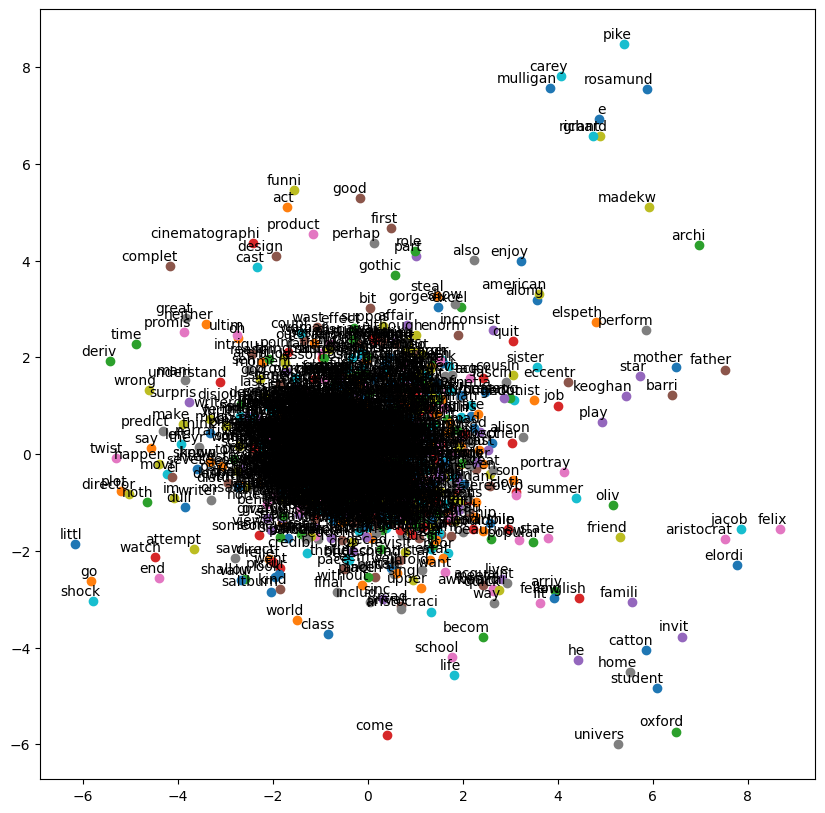

In [48]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the model
model = Word2Vec.load("word2vec_saltburn_reviews.model")

# Extract the word vectors
word_vectors = model.wv
words = list(word_vectors.key_to_index.keys())

# Use PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors[words])

# Plot the words in 2D space
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [49]:
# The GitHub link of your final csv file

"https://github.com/nikithchandra/INFO-5731/blob/main/saltburn_movie_reviews_with_sentiment.csv"


'https://github.com/nikithchandra/INFO-5731/blob/main/saltburn_movie_reviews_with_sentiment.csv'

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [50]:
# Type your answer
""" the questions were quite challenging and it helped me to learn about various aspects in sentiment analysis."""

' the questions were quite challenging and it helped me to learn about various aspects in sentiment analysis.'